# Tutorial: Red Neuronal (MLP) con Backpropagation para resolver XOR
Aprenderás los fundamentos de una Red Neuronal Multicapa (MLP) y cómo implementar una usando scikit-learn en Python para resolver el clásico problema de la compuerta lógica XOR.

## 1. Fundamentos Teóricos: Red Neuronal Backpropagation
Una Red Neuronal Multicapa es un tipo de red neuronal artificial de alimentación directa (feedforward). Se compone de al menos tres capas de nodos (neuronas):

+ Capa de Entrada (Input Layer): Recibe los datos iniciales (features). En nuestro caso, serán dos valores binarios [0, 1].

+ Capa Oculta (Hidden Layer): Una o más capas intermedias. Estas capas transforman los datos de entrada en una representación que la capa de salida sí puede separar linealmente.

+ Capa de Salida (Output Layer): Produce el resultado final. Para XOR, será un solo valor (0 o 1).

El término Backpropagation (Retropropagación) no es la red en sí, sino el algoritmo de entrenamiento que usan estas redes. Es el método para ajustar los "pesos" (la fuerza de conexión) entre las neuronas.

El proceso funciona en dos fases:

**Forward Pass** (Hacia adelante): Los datos de entrada fluyen desde la capa de entrada, a través de las capas ocultas, hasta la capa de salida para hacer una predicción.

**Backward Pass** (Hacia atrás):

Se calcula el error (la diferencia entre la predicción y el valor real esperado).

Este error se propaga "hacia atrás", desde la capa de salida hasta la de entrada.

Usando la regla de la cadena, la red determina la contribución de cada peso a ese error.

Finalmente, ajusta los pesos ligeramente para reducir el error en la próxima iteración.

Este ciclo de forward y backward pass se repite muchas veces (llamadas epochs o épocas) hasta que el error de la red es lo suficientemente bajo.

## 2. Fundamentos Matemáticos
A continuación, se presenta la matemática de forma simplificada para una red con una capa de entrada ($X$), una capa oculta (denotada con superíndice $[1]$) y una capa de salida (denotada con $[2]$).
###2.1 Forward Pass (Propagación Hacia Adelante)
El objetivo es calcular la predicción final ($\hat{Y}$), avanzando desde la entrada hasta la salida.
+ **Capa Oculta:** Cálculo lineal (la suma ponderada de las entradas más el sesgo):$$Z^{[1]} = W^{[1]} X + b^{[1]}$$$X$: Datos de entrada.

$W^{[1]}$: Matriz de pesos de la capa 1.

$b^{[1]}$: Vector de sesgos (biases) de la capa 1.

+ Función de Activación (introduce la no linealidad):
$$A^{[1]} = g(Z^{[1]})$$$g$: Una función no lineal como ReLU o Sigmoide.
$A^{[1]}$ es la salida de la capa oculta.


+ **Capa de Salida:** Cálculo lineal (usando la salida de la capa oculta $A^{[1]}$ como entrada):$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$Función de Activación (para clasificación binaria, usamos Sigmoide para obtener una probabilidad entre 0 y 1):$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})$$$\sigma$: La función Sigmoide, definida como $\sigma(z) = \frac{1}{1 + e^{-z}}$.

+ **Cálculo del Costo** (Error): Usamos una "Función de Costo" (Loss Function) para medir qué tan "equivocada" está la predicción $\hat{Y}$ en comparación con la etiqueta real $Y$. Para clasificación binaria, se usa la Entropía Cruzada Binaria (Binary Cross-Entropy):$$J = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)})]$$$m$: Número de ejemplos de entrenamiento.
### 2.2 Backward Pass (Retropropagación)
El objetivo es encontrar cómo cambiar $W$ y $b$ para minimizar el costo $J$. Esto se hace calculando las derivadas parciales (gradientes) del costo $J$ con respecto a cada parámetro ($W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}$), usando la regla de la cadena de cálculo.

**Gradiantes de la Capa de Salida** ($[2]$):(Derivada del Costo respecto a $Z^{[2]}$):$$dZ^{[2]} = A^{[2]} - Y$$
(Derivada respecto a $W^{[2]}$):$$dW^{[2]} = \frac{1}{m} dZ^{[2]} (A^{[1]})^T$$
(Derivada respecto a $b^{[2]}$):$$db^{[2]} = \frac{1}{m} \text{np.sum}(dZ^{[2]})$$
**Gradiantes de la Capa Oculta ($[1]$):**  (Propagamos el error hacia atrás, a $A^{[1]}$):$$dA^{[1]} = (W^{[2]})^T dZ^{[2]}$$(Derivada respecto a $Z^{[1]}$):$$dZ^{[1]} = dA^{[1]} * g'(Z^{[1]})$$$g'$: Es la derivada de la función de activación de la capa oculta (ej. $g'(\text{ReLU})$).$*$: Multiplicación elemento por elemento (Hadamard product).
(Derivada respecto a $W^{[1]}$):$$dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T$$
(Derivada respecto a $b^{[1]}$):$$db^{[1]} = \frac{1}{m} \text{np.sum}(dZ^{[1]})$$
**Actualización de Pesos (Descenso de Gradiente):** Finalmente, ajustamos los parámetros en la dirección opuesta al gradiente para minimizar el error.$\alpha$ (alfa) es la "tasa de aprendizaje" (learning rate).$$W = W - \alpha \cdot dW$$$$b = b - \alpha \cdot db$$

## 3. Implementación con scikit-learn
Afortunadamente, no necesitamos implementar toda esa matemática desde cero. La librería scikit-learn nos proporciona una clase llamada MLPClassifier que hace todo el trabajo pesado por nosotros.

MLPClassifier (Clasificador de Perceptrón Multicapa) implementa una red neuronal backpropagation optimizada para tareas de clasificación.

## 4. Descripción de Librerías y Funciones
En nuestro código, usaremos las siguientes herramientas:
+ numpy: Es la biblioteca fundamental para la computación científica en Python. La usaremos para crear nuestros arreglos (arrays) de datos de entrada $X$ y salida $y$.
+ sklearn.neural_network.MLPClassifier: Esta es la clase principal que implementa la red neuronal.
  + hidden_layer_sizes=(n_neuronas, ...): Define la arquitectura. Es una tupla que indica cuántas neuronas hay en cada capa oculta.
  + activation='relu': La función de activación para las capas ocultas. 'relu' (Unidad Lineal Rectificada) es la más común y eficiente.
  + solver='adam': El algoritmo optimizador para actualizar los pesos. 'adam' es un optimizador robusto y muy popular que funciona bien en la mayoría de los casos.
  + max_iter=...: El número máximo de épocas (ciclos de entrenamiento) que la red ejecutará.
  + learning_rate_init=...: La tasa de aprendizaje inicial ($\alpha$).
  + random_state=...: Un número fijo para inicializar los pesos aleatorios. Usar esto asegura que nuestros resultados sean reproducibles; si volvemos a ejecutar el código, obtendremos exactamente la misma red entrenada.
+ sklearn.metrics: Un módulo de Scikit-learn que contiene herramientas para evaluar el rendimiento del modelo.
  + accuracy_score: Calcula la precisión global.
  + confusion_matrix: Genera una matriz de confusión.

## 5. Pipeline de Implementación

### 5.1 Preparación y Selección del Modelo
Primero, importamos las librerías y definimos nuestros datos XOR.

¿Por qué una Red Neuronal?

Necesitamos un modelo que pueda crear fronteras de decisión no lineales. Una Red Neuronal Multicapa (MLP) con al menos una capa oculta es capaz de hacer esto. La capa oculta transforma el espacio de entrada en un nuevo espacio de características, permitiendo a la capa de salida hacer la clasificación correcta.

In [1]:
# Red Neuronal (MLP) con Backpropagation para resolver el problema XOR
# Autor: Alma Rodríguez

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Datos del problema XOR
# X son las entradas
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])

# y son las salidas esperadas
y = np.array([0, 1, 1, 0])

print("Datos de Entrada (X):")
print(X)
print("\nDatos de Salida (y):")
print(y)

Datos de Entrada (X):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Datos de Salida (y):
[0 1 1 0]


## 5.2 Entrenamiento del Modelo (Model Training)
Aquí, creamos una instancia de MLPClassifier.

Usaremos una arquitectura simple:

Una capa oculta con 3 neuronas: hidden_layer_sizes=(3,)

Función de activación ReLU: activation='relu'

Optimizador Adam: solver='adam'

Un número alto de iteraciones para asegurar que converja: max_iter=3000

Una tasa de aprendizaje de 0.01: learning_rate_init=0.001

Un random_state para reproducibilidad.

Luego, entrenamos el modelo usando el método .fit(X, y).

In [2]:
# 2. Creamos y entrenamos la Red Neuronal
print("Entrenando la Red Neuronal...")

# Definimos el modelo MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(3,),  # Una capa oculta con 3 neuronas
    activation='relu',        # Función de activación
    solver='adam',            # Optimizador
    max_iter=3000,            # Máximas épocas de entrenamiento
    learning_rate_init=0.001,  # Tasa de aprendizaje
    random_state=42           # Semilla para reproducibilidad
)

# Entrenamos el modelo
mlp.fit(X, y)

print("Entrenamiento completado")

Entrenando la Red Neuronal...
Entrenamiento completado


## 5.3 Predicción (Prediction)
Ahora que el modelo está entrenado, podemos usar el método .predict() para ver qué responde a las entradas XOR.
Creamos una función simple que recorre todas las combinaciones de entrada de $X$, obtiene la predicción del modelo y la compara con la salida esperada $y$.

In [3]:
# 3. Función de Predicción y Comprobación
def comprobar_xor(model, X_data, y_data):
    """
    Muestra la comparación entre las predicciones del modelo
    y los valores reales del problema XOR.
    """
    print("\n Comprobando Predicciones")
    predictions = model.predict(X_data)

    for i in range(len(X_data)):
        entrada = X_data[i]
        prediccion = predictions[i]
        esperado = y_data[i]

        status = "Correcto" if prediccion == esperado else "INCORRECTO"

        print(f"Entrada: {entrada} -> Predicción: {prediccion} (Esperado: {esperado}) ... {status}")

# Llamamos a la función con nuestro modelo entrenado
comprobar_xor(mlp, X, y)


 Comprobando Predicciones
Entrada: [0 0] -> Predicción: 0 (Esperado: 0) ... Correcto
Entrada: [0 1] -> Predicción: 1 (Esperado: 1) ... Correcto
Entrada: [1 0] -> Predicción: 1 (Esperado: 1) ... Correcto
Entrada: [1 1] -> Predicción: 0 (Esperado: 0) ... Correcto


### 5.4 Evaluación del Modelo (Model Evaluation)
Aunque nuestra función de comprobación nos da una buena idea, en Machine Learning usamos métricas formales para evaluar el rendimiento.

Accuracy (Precisión Global)

Descripción: Es la métrica más simple. Mide el porcentaje total de predicciones que fueron correctas.

Fórmula: $\text{Accuracy} = \frac{\text{Predicciones Correctas}}{\text{Total de Predicciones}} = \frac{TP + TN}{TP + TN + FP + FN}$

Confusion Matrix (Matriz de Confusión)

Descripción: Es una tabla que desglosa el rendimiento del modelo, mostrando dónde se confunde. Es especialmente útil en problemas con clases desbalanceadas (aunque XOR es balanceado).

Elementos:

+ True Negative (TN): (Arriba-Izquierda) La red predijo 0 y el valor real era 0.

+ False Positive (FP): (Arriba-Derecha) La red predijo 1, pero el valor real era 0. (Error Tipo I)

+ False Negative (FN): (Abajo-Izquierda) La red predijo 0, pero el valor real era 1. (Error Tipo II)

+ True Positive (TP): (Abajo-Derecha) La red predijo 1 y el valor real era 1.

Para un modelo perfecto, todos los valores estarían en la diagonal principal (TN y TP), y los valores de FP y FN serían cero.


 Evaluación del modelo

Accuracy: 100.00%

 Precisión del modelo: 100.00% 

Matriz de Confusión:
[[2 0]
 [0 2]]


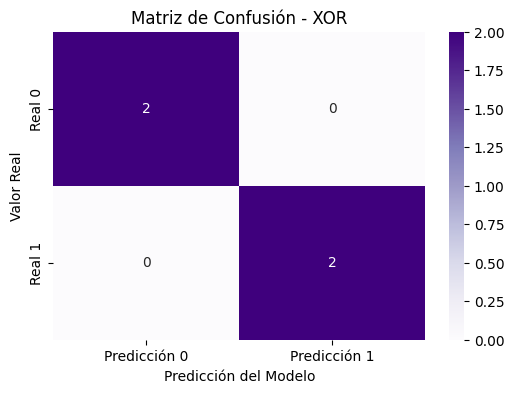


Interpretación de la Matriz:
TN (Predijo 0, Era 0): 2
FP (Predijo 1, Era 0): 0
FN (Predijo 0, Era 1): 0
TP (Predijo 1, Era 1): 2


In [5]:
# 4. Evaluación del modelo
print("\n Evaluación del modelo")

# Obtenemos las predicciones para usarlas en las métricas
y_pred = mlp.predict(X)

# Accuracy Precisión Global
acc = accuracy_score(y, y_pred)
print(f"\nAccuracy: {acc * 100:.2f}%")
print(f"\n Precisión del modelo: {acc * 100:.2f}% ")


# Matriz de Confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y, y_pred)
print(cm)

# Visualización gráfica de la matriz
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,  # Mostrar los números dentro de las celdas
    fmt="d",     # Formato de los números (enteros)
    cmap="Purples", # Paleta de colores
    xticklabels=["Predicción 0", "Predicción 1"],
    yticklabels=["Real 0", "Real 1"]
)
plt.title("Matriz de Confusión - XOR")
plt.xlabel("Predicción del Modelo")
plt.ylabel("Valor Real")
plt.show()

print("\nInterpretación de la Matriz:")
print(f"TN (Predijo 0, Era 0): {cm[0][0]}")
print(f"FP (Predijo 1, Era 0): {cm[0][1]}")
print(f"FN (Predijo 0, Era 1): {cm[1][0]}")
print(f"TP (Predijo 1, Era 1): {cm[1][1]}")